In [2]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [15]:
# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='0nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 10

print(f'Circuit:{circuit_n}, Variant:{variant}')

lsa_df= pickle.load( open(modellingpath + '/3954/paper/out/analytical/lsa_dataframes/all_dataframes/lsa_df_%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
print(lsa_df['system_class'].value_counts())

Circuit:circuit14, Variant:0nd
simple stable        14
Zero sign changes     4
Name: system_class, dtype: int64


In [19]:
instabilities = ['turing I', 'turing II', 'turing I hopf', 'turing I oscillatory', 'turing II hopf','hopf', 'turing semi-hopf']  
instabilities_df = lsa_df.loc[lsa_df['system_class'].isin(instabilities)]

turingStates = ['turing I','turing I oscillatory']  
turing_df = lsa_df.loc[lsa_df['system_class'].isin(turingStates)]

zeroSignChanges_df = lsa_df.loc[lsa_df['system_class'].isin(['Zero sign changes'])]


<ipython-input-23-b773615567a7>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
<ipython-input-23-b773615567a7>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)


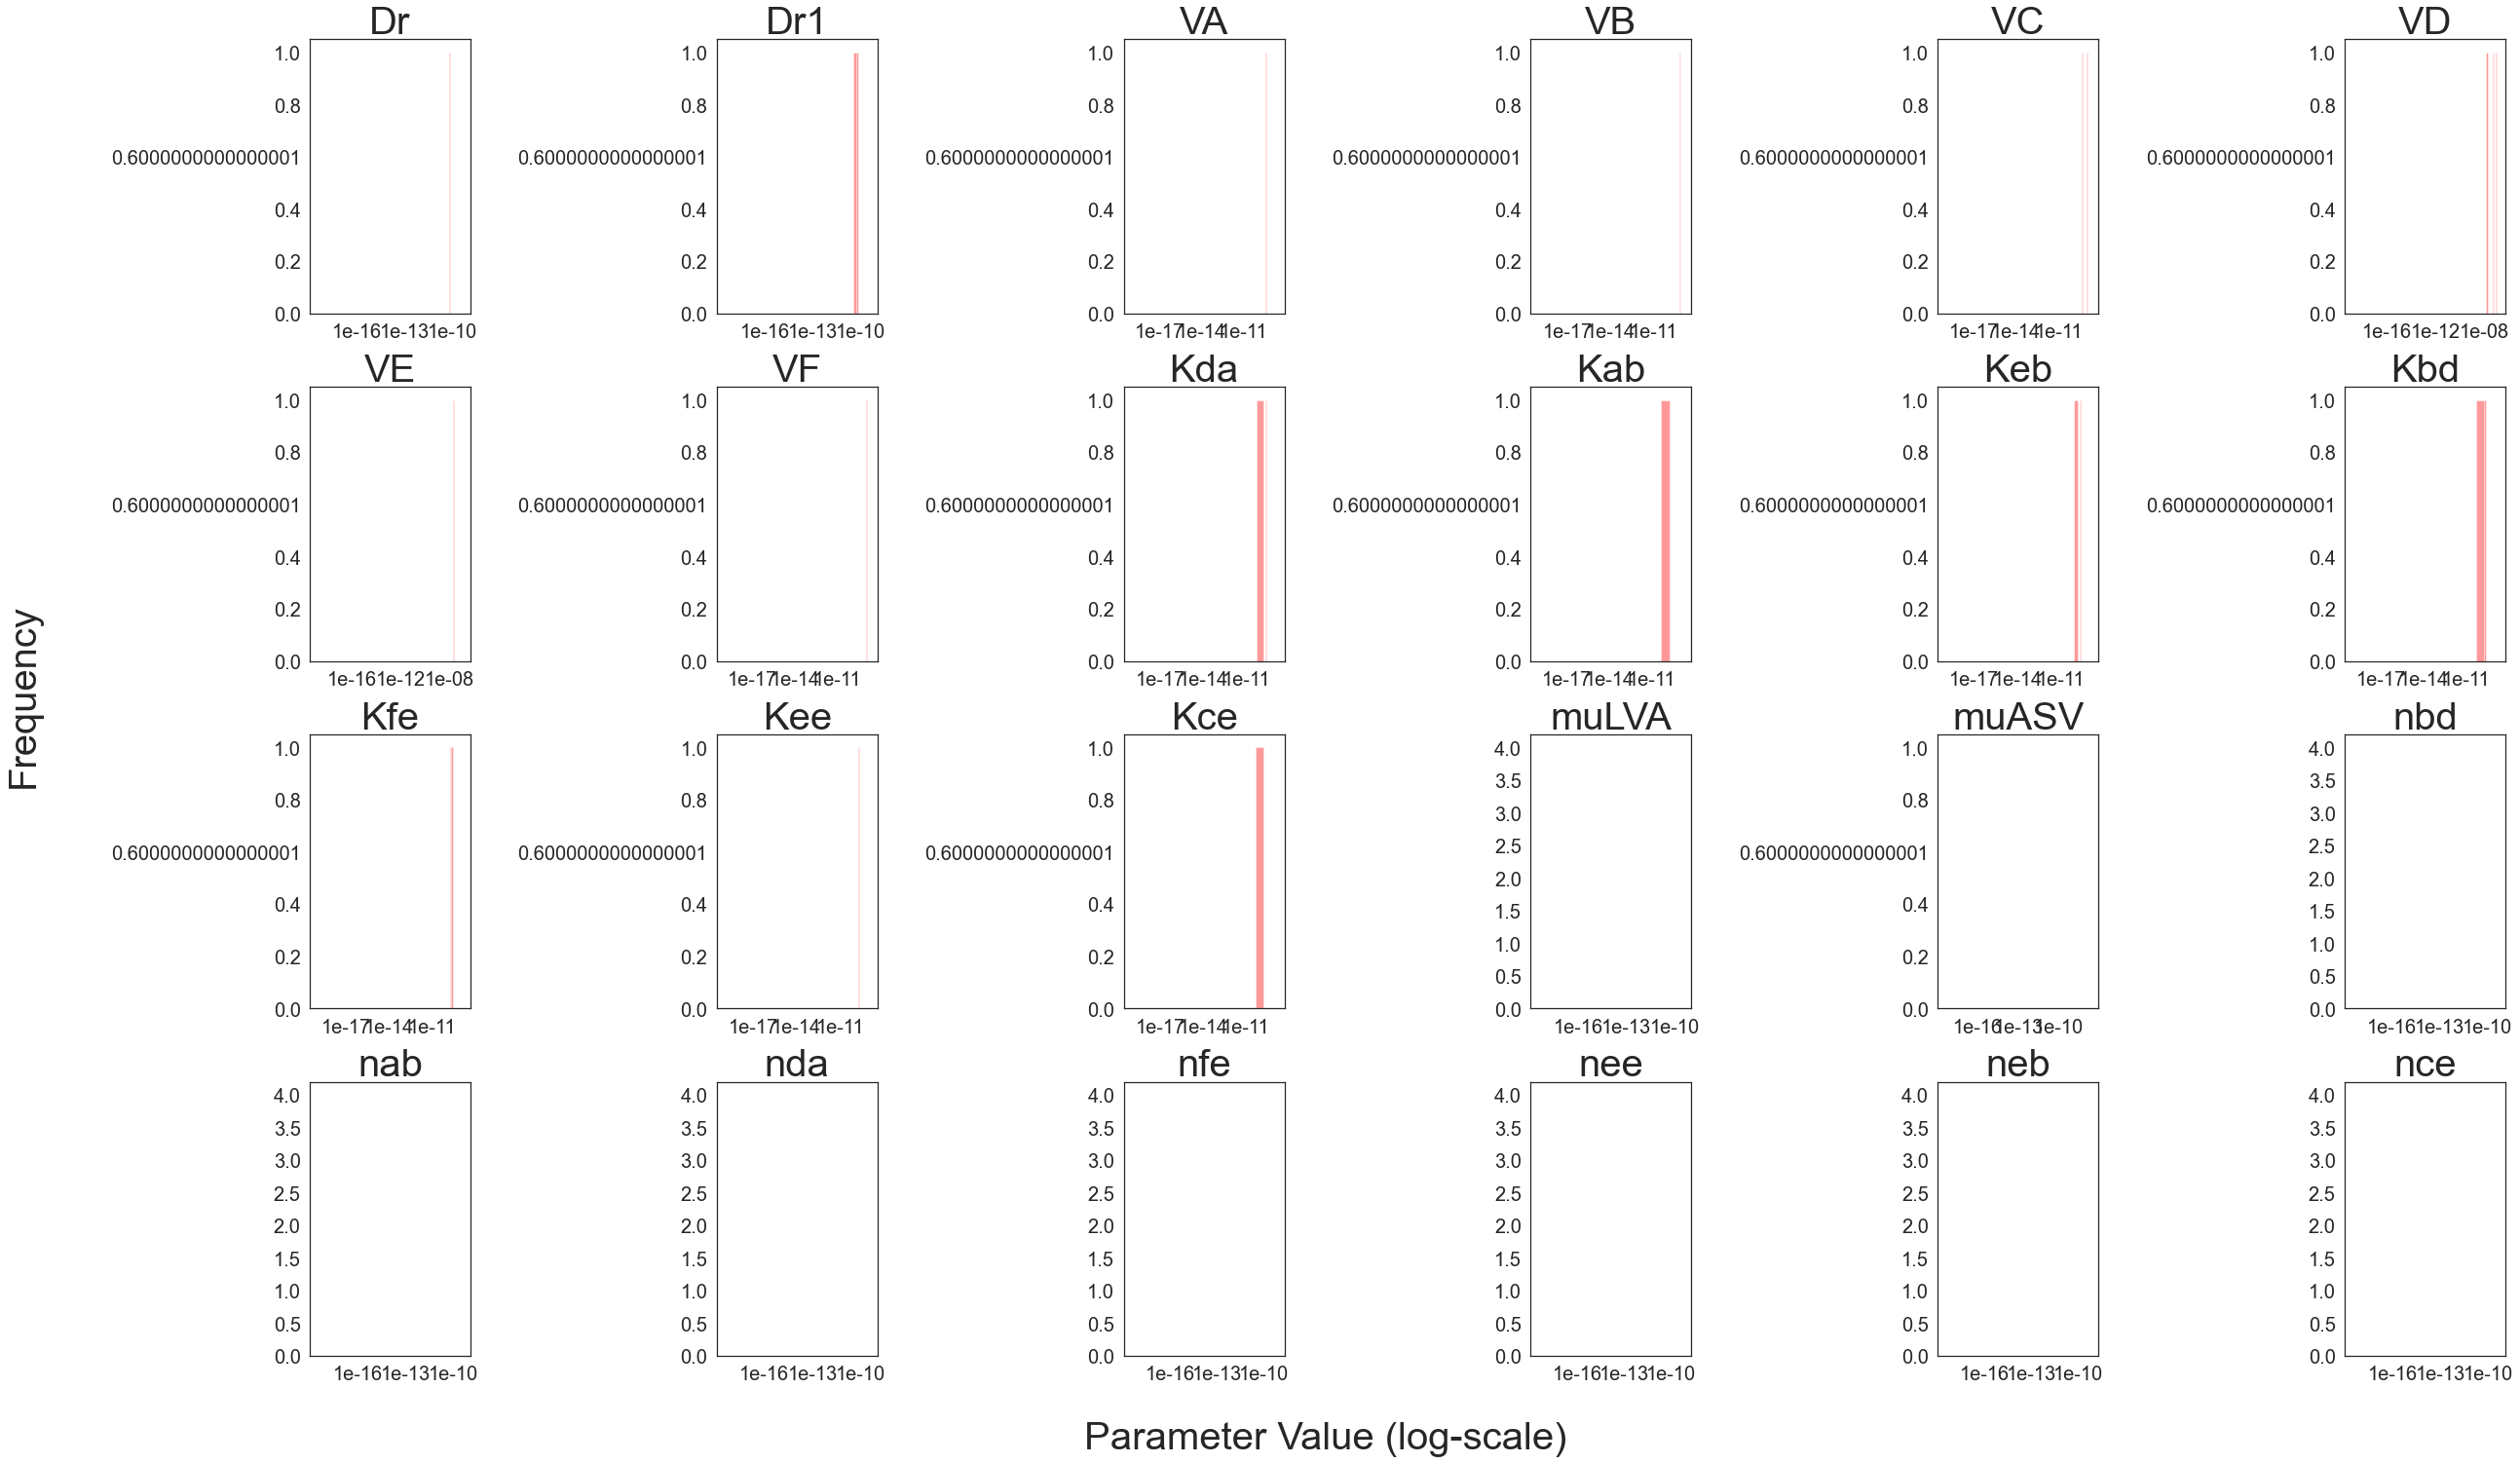

In [23]:
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=False)

fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(35,20))
axs = axs.flatten()

for count, parameter in enumerate(lsa_df.columns[:24]):
    LogMin, LogMax = np.log10(lsa_df.iloc[:,count].min()),np.log10(lsa_df.iloc[:,count].max())
    newBins = np.logspace(LogMin, LogMax,100)
    sns.distplot(lsa_df.iloc[253:,count].values,bins=100, kde=False,color = 'lightsteelblue', ax = axs[count])
    sns.distplot(zeroSignChanges_df.iloc[:253,count].values,bins=100, kde=False, color = 'red', ax = axs[count])


    axs[count].set_xscale('log')
    axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
    axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)



    axs[count].set_title(str(parameter),fontsize=40)
#     axs[count].set_xlim(0)

fig.tight_layout()
fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
fig.text(-0.03,0.5, "Frequency", ha="center", va="center", rotation=90 ,fontsize=40)
plt.show()

In [ ]:

def plotDist(parameterDictList,lhsDist_df):
    nvar = len(parameterDictList)
  
    fig,axs = plt.subplots(nrows=1,ncols=nvar,figsize=(nvar*5,5))
    for count,parameter in enumerate(parameterDictList):
        name = parameter['name']
        lhsDistColumn = lhsDist_df[name]
        sns.histplot(lhsDistColumn, ax=axs[count], bins=100)
        axs[count].set(ylabel ='',yticks=[],yticklabels=[])
        axs[count].set_xlabel(name, fontsize=15)
        # axs[count].set_xscale('log')
    plt.show()